# Research Skills: Image Analysis
## Worksheet 5 : Image Segmentation 1 

Sharon Ong, Department of Cognitive Science and Artificial Intelligence - Tilburg University

Image segmentation subdivides an image into constituent parts or isolates certain objects of an image. These objects can be further processed or analyzed for the extraction of quantitative information. Images can be noisy and difficult to segment properly. Multiple image processing steps are often required in the process of segmentation. Morphological image processing and filtering techniques which we have learnt as well as machine learning can be combined with segmentation to achieve more accurate image segmentation.
In the session, we will learn segmentation algorithms based on properties of intensity values. They can be divided to techniques that:
* partition an image based abrupt changes in intensity (Point, Line and Edge Detection)
* partition an image into similar regions (e.g. Thresholding, Region-growing, Watershed)

In [3]:
# load some packages 
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import data, color
from skimage.transform import hough_line, hough_line_peaks, hough_circle, hough_circle_peaks, probabilistic_hough_line
from skimage import feature
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from scipy import ndimage as ndi
from skimage.morphology import dilation, erosion, disk, opening, closing, reconstruction, extrema, binary_closing
from skimage.filters import roberts, sobel, sobel_h, sobel_v, prewitt, prewitt_v, prewitt_h
from skimage.filters import rank, threshold_otsu
from skimage import util
from skimage.measure import label, regionprops
from skimage.morphology import remove_small_objects

plt.rcParams['image.cmap'] = 'gray'


# Entry Level 
# 1. Edge Detection 

Edge detection is used detect discontinuities in intensity values, which are often the boundaries of objects. We find the discontinuities by calculating the first and/or second order derivatives of an image. The first derivative of choice in image processing is the gradient, which consist of the partial derivatives of the horizontal and vertical directions in an image.

# 1.1 Edge Detection with Image Convolutions  
Image convolutions with Prewitt and Sobel operators are often used to compute the image gradient. Although Prewitt operators are simpler to implement, Sobel operators are better at suppressing the image noise. The code below implements the horizontal and vertical image gradients for these operators. The edge magnitude can be thresholded to find edges with the 'sobel' and 'prewitt' functions. 

(<AxesSubplot: title={'center': 'Prewitt Edge Detection'}>,
 (-0.5, 163.5, 163.5, -0.5),
 Text(0.5, 1.0, 'Prewitt Edge Detection'))

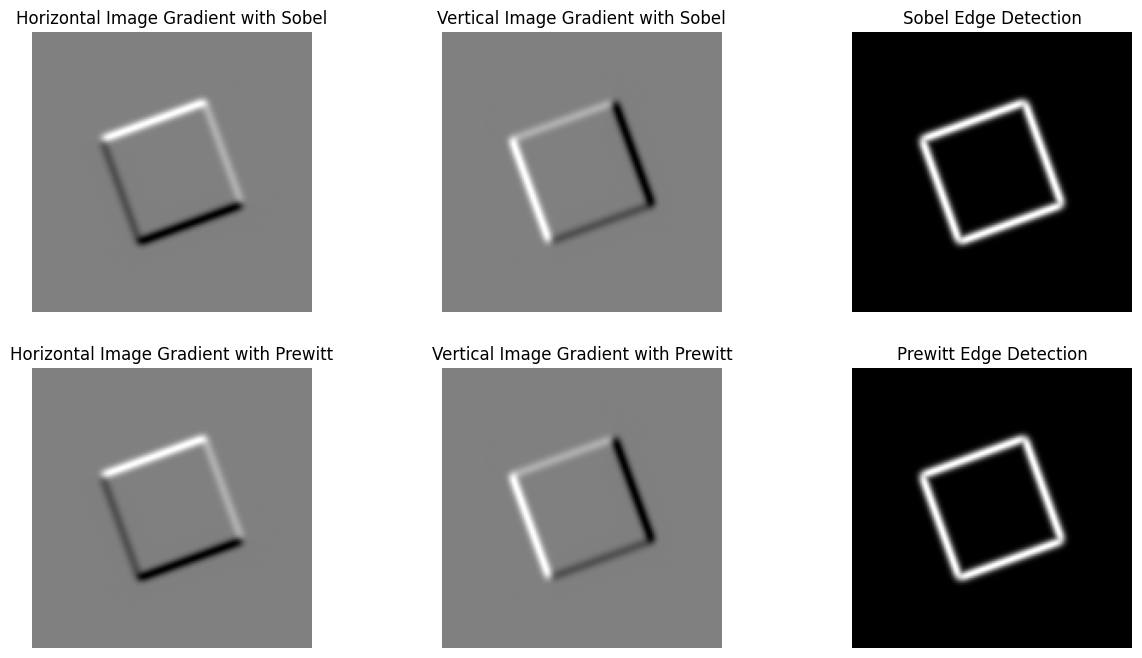

In [8]:
# Generate an image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

# rotate this square by 20 degrees and smooth it with a Gaussian filter 
im = ndi.rotate(im, 20, mode='constant')
im = ndi.gaussian_filter(im, 2)

# Prewitt Image Gradient 
edge_prewitt_h = prewitt_h(im)
edge_prewitt_v = prewitt_v(im)

# Sobel Image Gradient 
edge_sobel_h = sobel_h(im)
edge_sobel_v = sobel_v(im)

# Magnitude of image with Sobel operations 
edge_sobel = sobel(im)
# Magnitude of image with Prewitt operations 
edge_prewitt = prewitt(im)

plt.figure(figsize=(15,8))
plt.subplot(231), plt.imshow(edge_sobel_h), plt.axis('off'), plt.title('Horizontal Image Gradient with Sobel') 
plt.subplot(232), plt.imshow(edge_sobel_v, cmap='gray'), plt.axis('off'), plt.title('Vertical Image Gradient with Sobel') 
plt.subplot(233), plt.imshow(edge_sobel, cmap='gray'), plt.axis('off'), plt.title('Sobel Edge Detection')  
plt.subplot(234), plt.imshow(edge_prewitt_h, cmap='gray'), plt.axis('off'), plt.title('Horizontal Image Gradient with Prewitt') 
plt.subplot(235), plt.imshow(edge_prewitt_v, cmap='gray'), plt.axis('off'), plt.title('Vertical Image Gradient with Prewitt') 
plt.subplot(236), plt.imshow(edge_prewitt, cmap='gray'), plt.axis('off'), plt.title('Prewitt Edge Detection')   

In [ ]:
## Prewitt and Sobel are similar 

Apply the operations above to the file 'images\\bld.tif'. 

(<AxesSubplot: title={'center': 'Prewitt Edge Detection'}>,
 (-0.5, 599.5, 599.5, -0.5),
 Text(0.5, 1.0, 'Prewitt Edge Detection'))

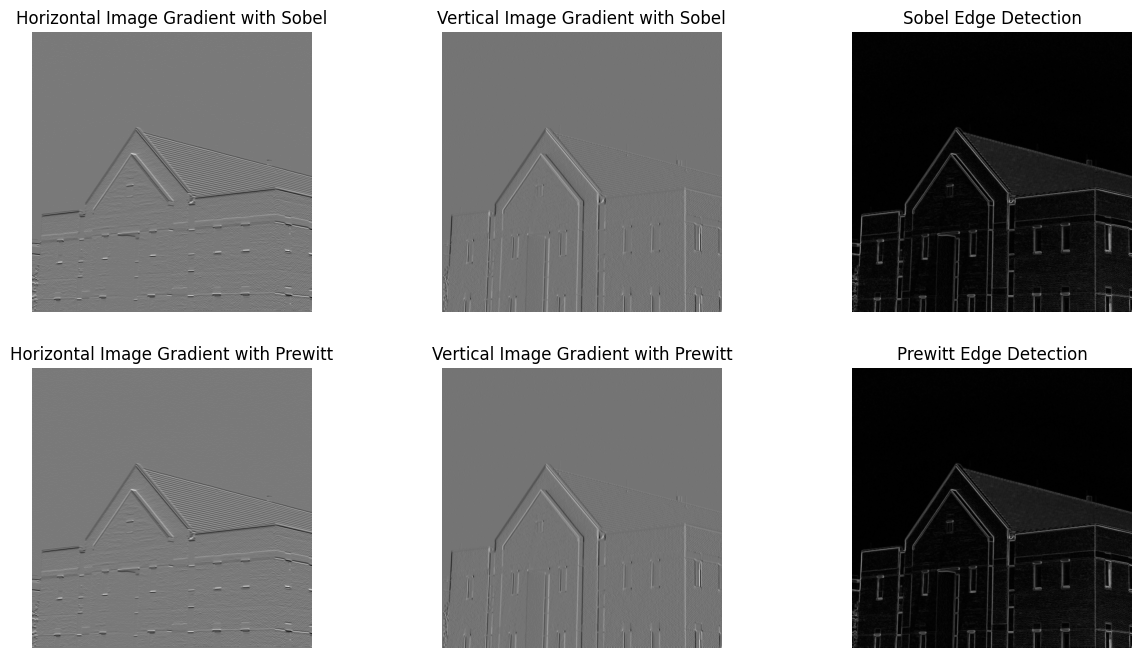

In [11]:
im = img_as_ubyte(io.imread('images/bld.tif'))

# 
# Your code goes here 
#
# Prewitt Image Gradient 
edge_prewitt_h = prewitt_h(im)
edge_prewitt_v = prewitt_v(im)

# Sobel Image Gradient 
edge_sobel_h = sobel_h(im)
edge_sobel_v = sobel_v(im)

# Magnitude of image with Sobel operations 
edge_sobel = sobel(im)
# Magnitude of image with Prewitt operations 
edge_prewitt = prewitt(im)

plt.figure(figsize=(15,8))
plt.subplot(231), plt.imshow(edge_sobel_h), plt.axis('off'), plt.title('Horizontal Image Gradient with Sobel') 
plt.subplot(232), plt.imshow(edge_sobel_v, cmap='gray'), plt.axis('off'), plt.title('Vertical Image Gradient with Sobel') 
plt.subplot(233), plt.imshow(edge_sobel, cmap='gray'), plt.axis('off'), plt.title('Sobel Edge Detection')  
plt.subplot(234), plt.imshow(edge_prewitt_h, cmap='gray'), plt.axis('off'), plt.title('Horizontal Image Gradient with Prewitt') 
plt.subplot(235), plt.imshow(edge_prewitt_v, cmap='gray'), plt.axis('off'), plt.title('Vertical Image Gradient with Prewitt') 
plt.subplot(236), plt.imshow(edge_prewitt, cmap='gray'), plt.axis('off'), plt.title('Prewitt Edge Detection')   

## 1.2 Canny Edge Detection 
The canny edge detector gives good edge detection for images which are typically noisy and have less well-defined edges. To determine whether a given pixel is an edge pixel, the detector incorporates the direction of the image gradient. There are two thresholds, a weak threshold T1 and a strong threshold T2 > T1. Pixels above the weak threshold count as
an edge only if there are pixels above the strong threshold adjacent to them. The syntax is 

    feature.canny(im, sigma=SIGMA,low_threshold=T1, high_threshold=T2)

where im is the image, T1 and T2 are the low and high thresholds and SIGMA is the standard deviation of a Gaussian filter that is applied to the image prior to edge detection. The code below implements a canny edge detector with a sigma of 1. 

1. Increase SIGMA to 3. What happens? 
2. Change the low and high thresholds values 

(<AxesSubplot: title={'center': 'Canny Edge Dectector (sigma = 1, T1=10, T2 = 50)'}>,
 (-0.5, 599.5, 599.5, -0.5),
 Text(0.5, 1.0, 'Canny Edge Dectector (sigma = 1, T1=10, T2 = 50)'))

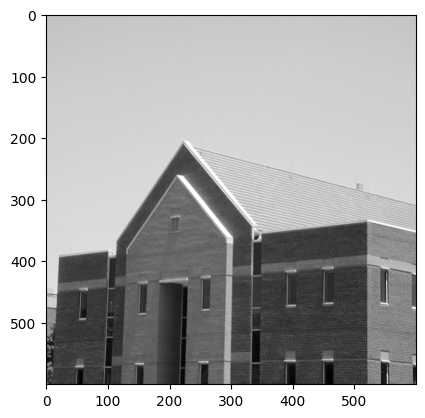

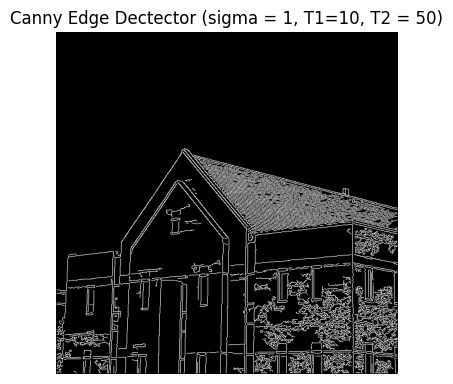

In [10]:
im = img_as_ubyte(io.imread('images/bld.tif'))

plt.figure()
plt.imshow(im)

edge_canny = feature.canny(im, sigma=1,low_threshold=10, high_threshold=50)
plt.figure(figsize=(15,8))
plt.subplot(131), plt.imshow(edge_canny, cmap='gray'), plt.axis('off'), plt.title('Canny Edge Dectector (sigma = 1, T1=10, T2 = 50)')  

(<AxesSubplot: title={'center': 'Canny Edge Dectector (sigma = 1, T1=10, T2 = 100)'}>,
 (-0.5, 599.5, 599.5, -0.5),
 Text(0.5, 1.0, 'Canny Edge Dectector (sigma = 1, T1=10, T2 = 100)'))

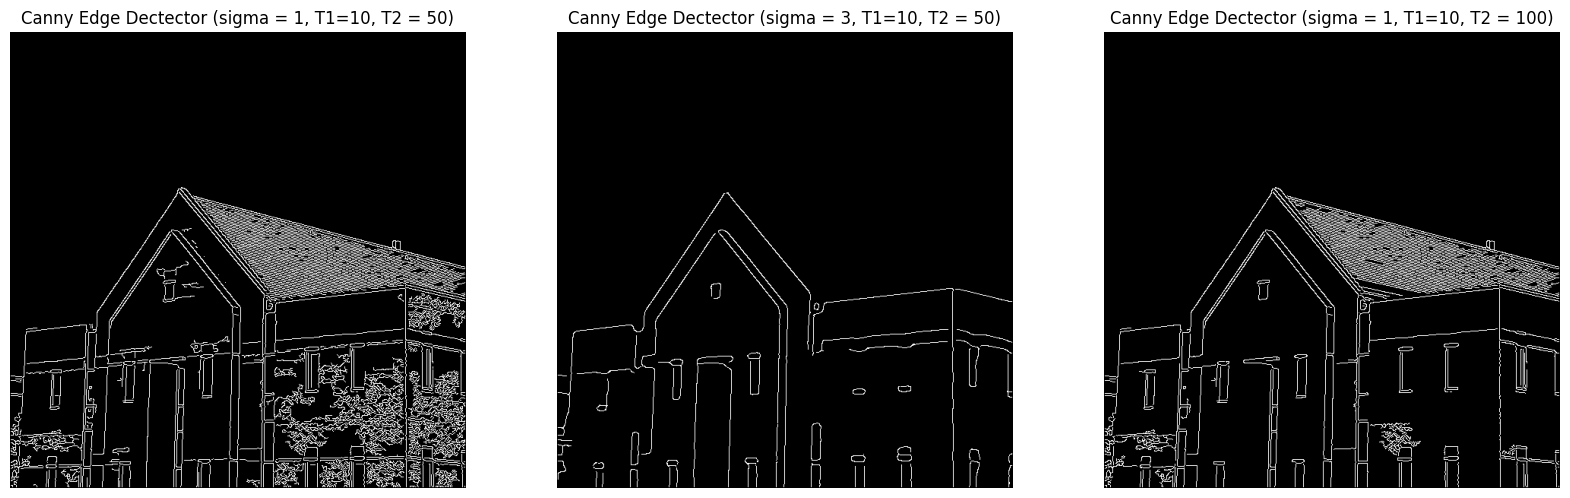

In [14]:
#
# Your code goes here 
#
# TODO changed sigma
# high sigma = only thick edges
# high threshold = more edges

edge_canny = feature.canny(im, sigma=1,low_threshold=10, high_threshold=50)
edge_canny1 = feature.canny(im, sigma=3,low_threshold=10, high_threshold=50)
edge_canny2 = feature.canny(im, sigma=1,low_threshold=10, high_threshold=100)
plt.figure(figsize=(20,8))
plt.subplot(131), plt.imshow(edge_canny, cmap='gray'), plt.axis('off'), plt.title('Canny Edge Dectector (sigma = 1, T1=10, T2 = 50)')  
plt.subplot(132), plt.imshow(edge_canny1, cmap='gray'), plt.axis('off'), plt.title('Canny Edge Dectector (sigma = 3, T1=10, T2 = 50)') # large edges
plt.subplot(133), plt.imshow(edge_canny2, cmap='gray'), plt.axis('off'), plt.title('Canny Edge Dectector (sigma = 1, T1=10, T2 = 100)') # less edges


## 1.2 Edge Detection with Morphological Operations 
Edges can also be found via morphological operations. On the same image, perform the following operations
1. Dilate the image (im) with a disk structuring element of 2 pixels (disk(2)) and display the results 
2. Erode the image (im) with a disk structuring element of 2 pixels (disk(2)) and display the results 
3. Subtract the Eroded Image from the dilated image to get the gradient image  (im_gradient = im_dilate - im_erode). Display the results 

(<AxesSubplot: title={'center': 'im_gradient'}>,
 (-0.5, 599.5, 599.5, -0.5),
 Text(0.5, 1.0, 'im_gradient'))

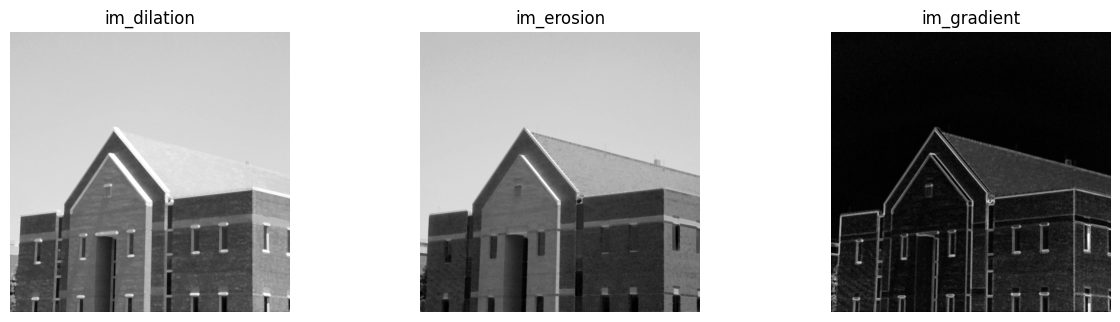

In [37]:
#
# Your code goes here 
#

im_dilation = dilation(im, disk(2))
im_erosion  = erosion(im, disk(2))
im_gradient  = im_dilation - im_erosion


plt.figure(figsize=(15,8))
plt.subplot(231), plt.imshow(im_dilation,  cmap='gray'), plt.axis('off'), plt.title('im_dilation') 
plt.subplot(232), plt.imshow(im_erosion, cmap='gray'), plt.axis('off'), plt.title('im_erosion') 
plt.subplot(233), plt.imshow(im_gradient, cmap='gray'), plt.axis('off'), plt.title('im_gradient')  

The code below implements a morphological gradient on an image with a build in function in skimage (rank.gradient). Try increasing the structuring element.  

(<AxesSubplot: title={'center': 'Image Gradient'}>,
 (-0.5, 599.5, 599.5, -0.5),
 Text(0.5, 1.0, 'Image Gradient'))

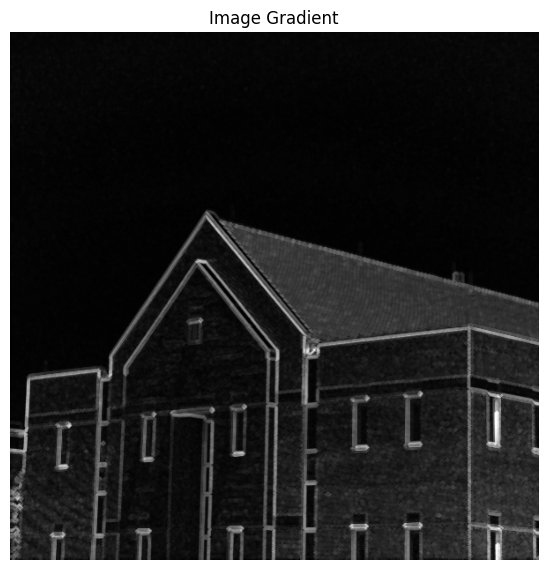

In [16]:
im = img_as_ubyte(io.imread('images/bld.tif'))
im_gradient2 = rank.gradient(im, disk(2)) #rank.gradient diallation and erosion (subtract dialled with eroded image)
plt.figure(figsize=(15,8))
plt.subplot(121), plt.imshow(im_gradient2, cmap='gray'), plt.axis('off'), plt.title('Image Gradient')   


# 2. Hough Transform 
The resulting pixels from edge detection may not be completely part of an edge due to noise, breaks in edges from non-uniform illumination and other effects. Hough transforms can be used to find and link segments into meaningful edges. The main idea for hough transforms are
* For each line segment, L, there is a unique line segment, S, perpendicular to L which passes through the origin.
* S, the line segment, has a unique distance or radius, r, from the origin, and angle \theta from the horizontal axis. This angle and distance is a point in the Hough space.
* A point in the image space has a infinite number of lines that could pass through it, each with a unique distance and angle.

The following code performs edge detection on 'bld.tif' and then Hough transforms on find lines. The input "num_peaks" allows you to set the maximum number of peaks that the function "hough_line_peaks" returns. E.g. num_peaks = 5 returns the top five peaks in Hough space which correspond to the top five most prominent lines in image space.  
Try increasing num_peaks = 20. 

[ 0.01745329  0.59341195 -1.30899694  1.48352986  1.48352986] [ 307.  298. -143.  432.  447.]


Text(0.5, 1.0, 'Detected lines (num_peaks = 5)')

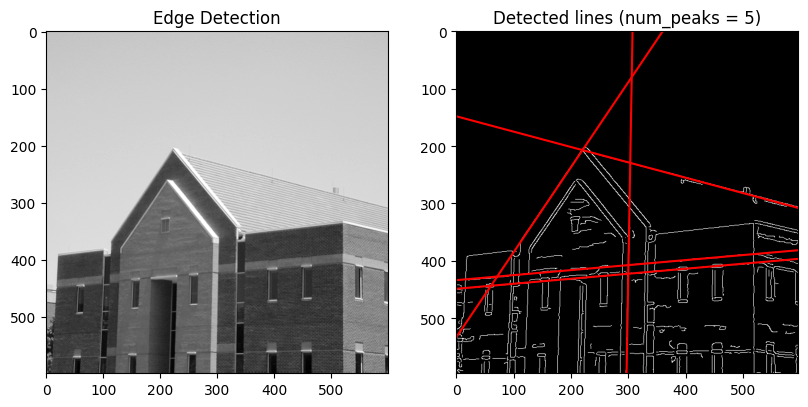

In [20]:
im = img_as_ubyte(io.imread('images/bld.tif'))
from skimage.draw import line

# canny edge detection 
im_edges  = feature.canny(im, sigma=2,low_threshold=10, high_threshold=20)
# crop to remove the lines white lines on the sides of the images 
im_edges = im_edges[2:im.shape[0]-2,2:im.shape[1]-2]


# Hough transforms to find lines on the edge detection results

[H, theta, rho] = hough_line(im_edges)
hspace, angles, dists = hough_line_peaks(H, theta, rho,num_peaks=5)

print(angles, dists)
plt.figure(figsize=(15,8))
plt.subplot(131), plt.imshow(im, cmap='gray'), plt.title('Edge Detection')
plt.subplot(132), plt.imshow(im_edges, cmap='gray') 
row1, col1 = im_edges.shape
for angle, dist in zip(angles, dists):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - col1 * np.cos(angle)) / np.sin(angle)
    plt.plot((0, col1), (y0, y1), '-r')
plt.axis((0, col1, row1, 0))
plt.title('Detected lines (num_peaks = 5)')

#
# Your code goes here 
#


## 2.1 Probabilistic Hough Transform
Progressive Probabilistic Hough Transform assumes that using a random subset of voting points give a good approximation to the actual result, and that lines can be extracted during the voting process by walking along connected components. As a result, the beginning and end of each line segment is obtained.  The function "probabilistic_hough_line" has three parameters: a general threshold that is applied to the Hough accumulator, a minimum line and the line gap that influences line merging. The following code implements a probabilistic Hough transfrom. 

TODO what is random subset?
- from upper lines do connected componets

Text(0.5, 1.0, 'Detected lines')

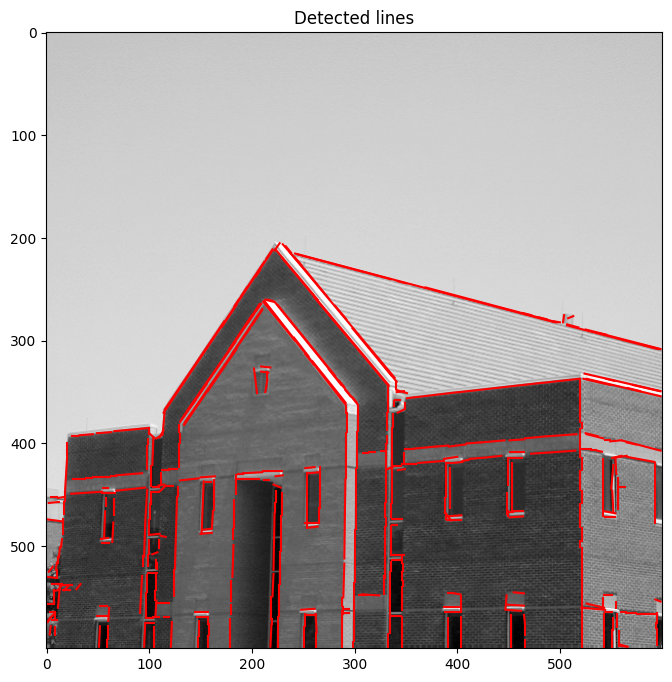

In [18]:
im = img_as_ubyte(io.imread('images/bld.tif'))

# canny edge detection 
im_edges  = feature.canny(im, sigma=2,low_threshold=10, high_threshold=50)
#  the probabilistic hough transform     
lines = probabilistic_hough_line(im_edges, threshold=10, line_length=5, line_gap=3)
# TODO learn all the hyperparameters above

# display results 
plt.figure(figsize=(15,8))
plt.imshow(im, cmap='gray') 
row1, col1 = im.shape
for line in lines:
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]), '-r')
plt.title('Detected lines')



## 2.2 Quantifying the angular distribution of the lines found  
The following code shows how you can display how many lines are in each angular range. Try the following code with other images.

(20,)
[1 0 0 0 2 0 0 0 0 8 0 0 0 2 0 0 0 0 0 3]


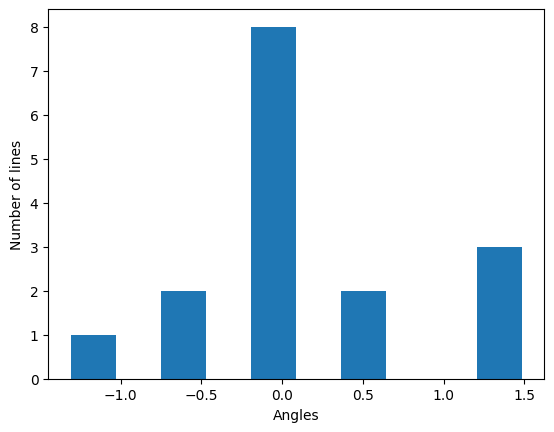

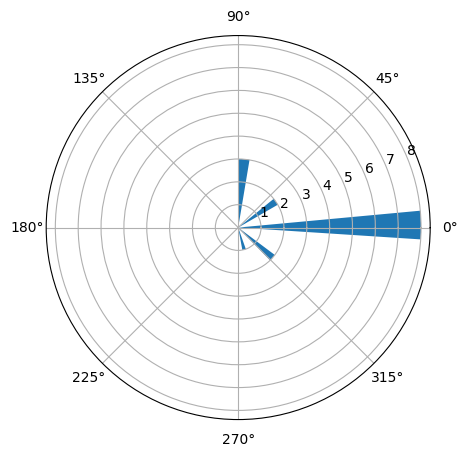

In [22]:
im = img_as_ubyte(io.imread('images/bld.tif'))

# canny edge detection 
im_edges  = feature.canny(im, sigma=2,low_threshold=10, high_threshold=50)

# Hough transforms to find lines on the edge detection results
[H, theta, rho] = hough_line(im_edges);
hspace, angles, dists = hough_line_peaks(H, theta, rho,num_peaks=50)

# display the number of lines at each range of angles 
fig = plt.figure()
plt.hist(angles)
plt.ylabel('Number of lines')
plt.xlabel('Angles')

# display the number of lines at each range of angles in a polar (rose) plot 
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
N = 20
radii = np.histogram(angles,bins=N)
atheta = np.linspace(min(angles), max(angles), N)
print(atheta.shape)
print(radii[0])

width = np.pi/N 
bars = plt.bar(atheta, radii[0], width=width, bottom=0.0)


## 2.3 Circle Detection with Hough Transform 
The following code implements a Hough Circle Transform.  

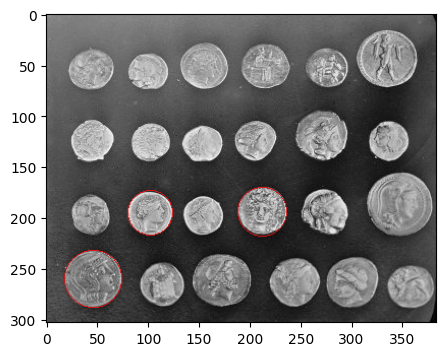

In [26]:
# Load picture and detect edges
image = img_as_ubyte(data.coins())#[160:230, 70:270])
edges = feature.canny(image, sigma=3, low_threshold=10, high_threshold=50)

# Detect two radii
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,total_num_peaks=3)
# TODO change total_num_peaks

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

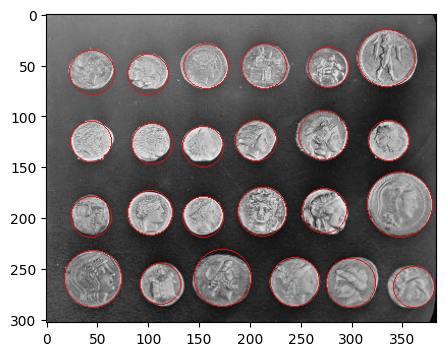

In [35]:
# Load picture and detect edges
image = img_as_ubyte(data.coins())#[160:230, 70:270])
edges = feature.canny(image, sigma=3, low_threshold=10, high_threshold=50)

# Detect two radii
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,min_ydistance=30, min_xdistance=30, total_num_peaks=40)
# TODO change total_num_peaks

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

# 3 Morphological watersheds 
Morphological watersheds are useful for segmenting objects that are touching one another. The watershed algorithm can be implemented in the skimage as 
        
        labels = watershed(im) 
where im is the input image and labels is a labeled matrix image having positive integer values at different regions and 0 at the watershed ridge lines. 

# 3.1 Watershed segmentation by the distance transform
The following code shows how to use watersheds to separating two touching objects circles by distance transform. This image modified so its catchment basins are two circular objects using a distance transfrom.  The distance transform of a binary image is the distance from every pixel to the nearest nonzero-valued pixel.  

Text(0.5, 1.0, 'Separated objects')

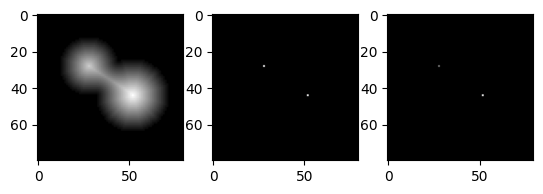

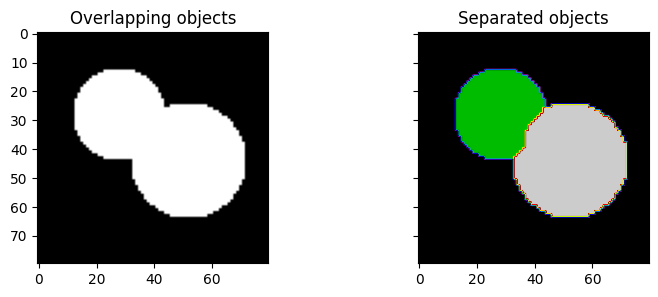

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

#from skimage.morphology import watershed
from skimage.segmentation import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)


# This image modified so its catchment basins are two circular objects using a distance transfrom. 
# The distance transform of a binary image is the distance from every pixel to the nearest nonzero-valued pixel.
# This returns only one catchment basin spanning the entire image.  
# The complement of the distance (-distance) returns two catchment basins 
distance = ndi.distance_transform_edt(image)

plt.figure()
plt.subplot(131), plt.imshow(distance) #distance from edge

# Two markers are created by taking local maxima of the distance to the background
local_maxi = peak_local_max(distance, footprint=np.ones((3, 3)), labels=image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(local_maxi.T)] = True
plt.subplot(132),  plt.imshow(mask) #show local maxima

markers, _ = ndi.label(mask)
plt.subplot(133),  plt.imshow(markers) #different labels can be derived

# We input the following parameters to the watershed function 
# (1) The complement of the distance (-distance) returns two catchment basins 
# (2) An array marking the basins with the values to be assigned in the label matrix.
# (3) Array of same shape as image. Only points at which mask == True will be labeled 
# labels = watershed(-distance, mask, mask=image) #dpes not work (do not know when to stop diallating)
labels = watershed(-distance, markers, mask=image)

# Display the results 
fig, axes = plt.subplots(ncols=2, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[1].set_title('Separated objects')

# 3.2 Watershed segmentation with image gradients and markers
Segmentation using the watershed transform works better if you can identify, or "mark," foreground objects. Marker-controlled watershed segmentation follows this basic procedure:
1. Compute a segmentation function (image gradient magnitude). This is an image whose dark regions are the objects you are trying to segment.
2. Compute foreground markers. These are connected blobs of pixels within each of the objects.
3. Modify the segmentation function so that it only has minima at the foreground and background marker locations.
4. Compute the watershed transform of the modified segmentation function

(<AxesSubplot: title={'center': 'Watershed Results '}>,
 (-0.5, 731.5, 485.5, -0.5),
 Text(0.5, 1.0, 'Watershed Results '))

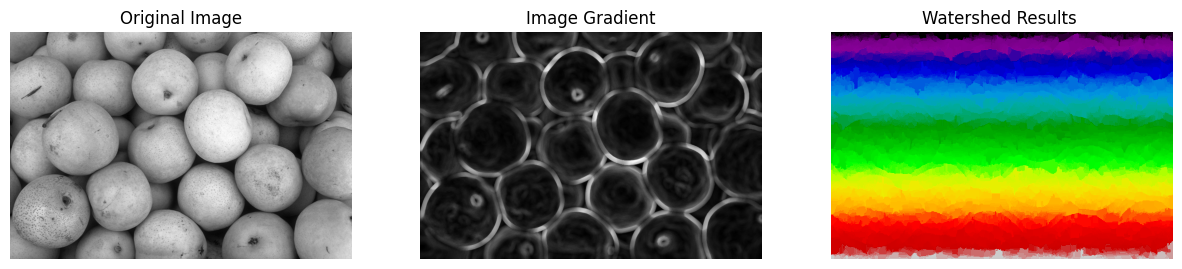

In [42]:
# load an image of pears 
# the goal is the segment the bears 
im = img_as_ubyte(color.rgb2gray(io.imread('images/pears.png')))

# denoise image
denoised = rank.median(im, disk(7))

# Compute the gradient magnitude. The gradient is high at the borders of the objects and low (mostly) inside the objects.
im_gradient = rank.gradient(denoised, disk(5))

# Without additional preprocessing such as the marker computations below, 
# using the watershed transform directly often results in "oversegmentation."
labels1 = watershed(im_gradient)

plt.figure(figsize=(15,8))
plt.subplot(131), plt.imshow(im, cmap='gray'), plt.axis('off'), plt.title('Original Image')
plt.subplot(132), plt.imshow(im_gradient, cmap='gray') , plt.axis('off'), plt.title('Image Gradient')
plt.subplot(133), plt.imshow(labels1, cmap=plt.cm.nipy_spectral), plt.axis('off'), plt.title('Watershed Results ')




Without additional preprocessing such as the marker computations below, using the watershed transform directly often results in "oversegmentation." Foreground markers must be connected blobs of pixels inside each of the foreground objects. The code use morphological techniques called "opening-by-reconstruction" and "closing-by-reconstruction" to "clean" up the image. These operations will create flat maxima inside each object. 

Opening is an erosion followed by a dilation, while opening-by-reconstruction is an erosion followed by a morphological reconstruction.  The code below implements an opening-by-reconstruction followed by a closing-by-reconstruction. 
Compare the results on these two functions 


(<AxesSubplot: title={'center': 'Local maxima'}>,
 (-0.5, 731.5, 485.5, -0.5),
 Text(0.5, 1.0, 'Local maxima'))

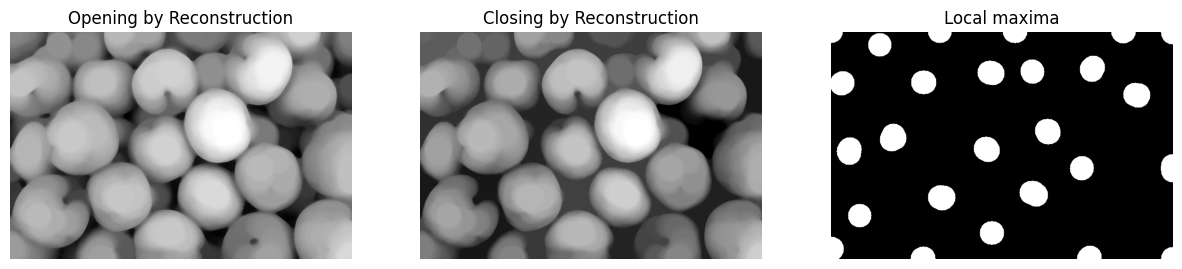

In [47]:
# Mark the Foreground Markers
im_open = opening(denoised,disk(25))
im_erode = erosion(denoised,disk(25))
im_oer  = reconstruction(im_erode,im_open); # opening by reconstruction # erosion -> Dilate until red line is reached

im_oerd = dilation(im_oer,disk(25))
im_oercr = reconstruction(util.invert(im_oerd),util.invert(im_oer));
im_oercr = util.invert(im_oercr);


im_foreground =  extrema.h_maxima(im_oercr,h=0.05)

plt.figure(figsize=(15,8))
plt.subplot(131), plt.imshow(im_oer, cmap='gray'), plt.axis('off'), plt.title('Opening by Reconstruction') 
plt.subplot(132), plt.imshow(im_oercr, cmap='gray'), plt.axis('off'), plt.title('Closing by Reconstruction') 
plt.subplot(133), plt.imshow(im_foreground, cmap='gray'), plt.axis('off'), plt.title('Local maxima') 



Compare an opening with an opening by reconstruction and a closing with a closing by reconstruction. 
1. Perform an opening in the denoised image 
2. Perform a closing on the image obtained in 1. 
3. Display the results 
You will see that a reconstruction-based opening and closing are more effective than standard opening and closing at removing small blemishes without affecting the overall shapes of the objects.

In [50]:
#
# Your code goes here 
#

im_open = opening(denoised,disk(25))
im_closing = closing(denoised,disk(25))

im_open_r  = reconstruction(im_open,im_open); # opening by reconstruction # erosion -> Dilate until red line is reached
im_closing_r = reconstruction(im_closing,im_open); # opening by reconstruction # erosion -> Dilate until red line is reached


im_foreground_open_r =  extrema.h_maxima(im_open_r,h=0.05)
im_foreground_closing_r =  extrema.h_maxima(im_closing_r,h=0.05)

plt.figure(figsize=(15,8))
plt.subplot(221), plt.imshow(im_open, cmap='gray'), plt.axis('off'), plt.title('Opening') 
plt.subplot(222), plt.imshow(im_foreground_open_r, cmap='gray'), plt.axis('off'), plt.title('Opening by Reconstruction)') 

plt.subplot(223), plt.imshow(im_closing, cmap='gray'), plt.axis('off'), plt.title('Closing') 
plt.subplot(224), plt.imshow(im_foreground_closing_r, cmap='gray'), plt.axis('off'), plt.title('Closing by Reconstruction') 

ValueError: Intensity of seed image must be less than that of the mask image for reconstruction by dilation.

Calculate the regional maxima of Iobrcbr to obtain good foreground markers.To obtain good foreground markers, we can calculate the local maxima or h maxima on the cleaned image and apply watershed with these markers. 

((-0.5, 731.5, 485.5, -0.5),
 Text(0.5, 1.0, 'Watershed Results over Original Image'))

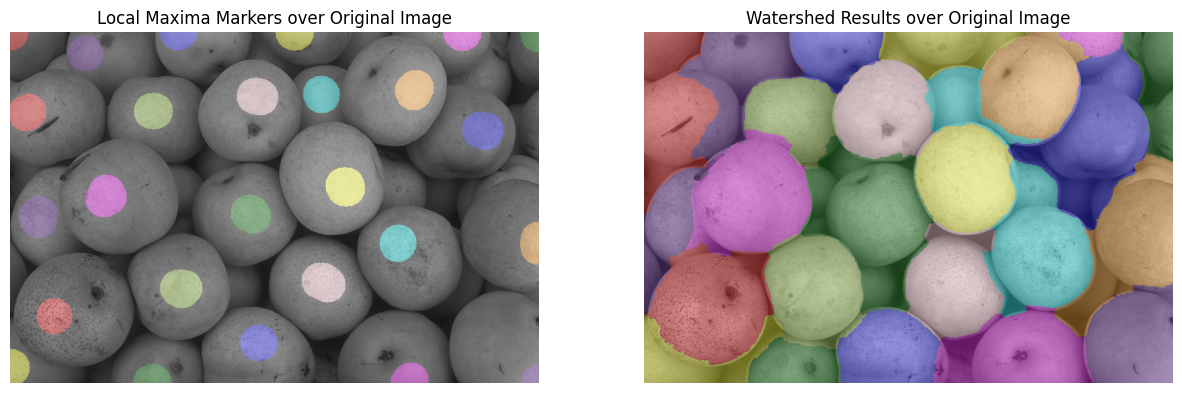

In [44]:
# Calculate the local maxima of opening and closing by reconstruction. 
im_foreground =  extrema.h_maxima(im_oercr,h=0.05)
# assign a unique label to each marker. 
label_img = label(im_foreground)

# overlay the foreground markers to the original image. 
foreground_label_overlay = color.label2rgb(label_img, image=im, bg_label=0)

watershed_labels = watershed(im_gradient,label_img);
watershed_label_overlay = color.label2rgb(watershed_labels, image=im,  bg_label=0)

plt.figure(figsize=(15,8))
plt.subplot(121), plt.imshow(foreground_label_overlay, cmap=plt.cm.nipy_spectral), 
plt.axis('off'), plt.title('Local Maxima Markers over Original Image') 
plt.subplot(122), plt.imshow(watershed_label_overlay, cmap=plt.cm.nipy_spectral), 
plt.axis('off'), plt.title('Watershed Results over Original Image') 

# 4. Advanced Level
Implement morphological watershed to split some yeast cells. The file has been loaded for you. This image has nuclei marked in white and the cell marked in gray. Apply two thresholds (one for the nuclei and the other for the cell) to create the two binary images (one with segmented nuclei and the other will segmented cell (including nuclei)). 

Perform a watershed operation on the image gradient. Use the first image as markers for the watershed and the second as mask such that only points in the cell are labelled. 

[[0.00925926 0.00925926 0.00925926 0.00925926 0.00925926]
 [0.00925926 0.00925926 0.00925926 0.00925926 0.00925926]
 [0.00925926 0.00925926 0.00925926 0.00925926 0.00925926]
 [0.00925926 0.00925926 0.00925926 0.00925926 0.00925926]
 [0.00925926 0.00925926 0.00925926 0.00925926 0.00925926]]
[[0.16992188 0.16992188 0.16992188 0.16992188 0.16992188]
 [0.16992188 0.16992188 0.16992188 0.16992188 0.16992188]
 [0.16992188 0.16992188 0.16992188 0.16992188 0.16992188]
 [0.16992188 0.16992188 0.16992188 0.16992188 0.16992188]
 [0.16992188 0.16992188 0.16992188 0.16992188 0.16992188]]


(<AxesSubplot: title={'center': 'Threshold 2 Image'}>,
 Text(0.5, 1.0, 'Threshold 2 Image'))

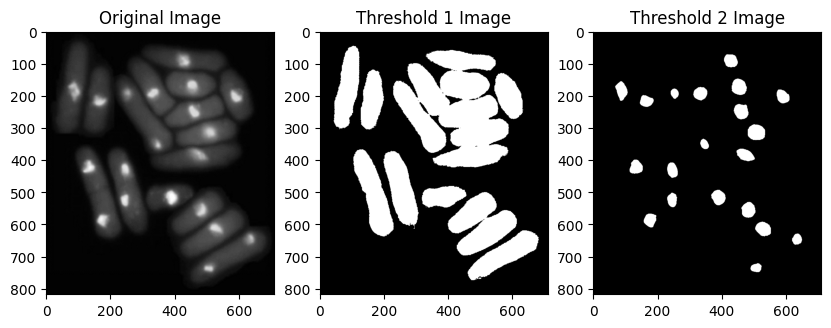

In [65]:
im  =img_as_ubyte(io.imread('images/nFDkX.png')) 
#
# Your code goes here 
# 
from copy import deepcopy
#normalize
im = (im - im.min())/(im.max() - im.min())

th1 = threshold_otsu(im)
cellMask = im > th1

im2 = deepcopy(im)
im2[im < th1] = th1

print(im[0:5, 0:5])
print(im2[0:5, 0:5])

th2 = threshold_otsu(im2)
nucleiMask = im2 > th2

plt.figure(figsize=(10,8))
plt.subplot(231), plt.imshow(im, vmin = 0, vmax = 1), plt.title('Original Image') 
plt.subplot(232), plt.imshow(cellMask, vmin = 0, vmax = 1), plt.title('Threshold 1 Image') 
plt.subplot(233), plt.imshow(nucleiMask, vmin = 0, vmax = 1), plt.title('Threshold 2 Image') 


In [66]:
label_nuclei = label(nucleiMask)
label_nuclei_image = color.label2rgb(label_nuclei)

In [74]:
im_gradient = rank.gradient(im, disk(2))
watershed_labels = watershed(-im_gradient, label_nuclei, mask=cellMask)

C:\Users\tobi1\AppData\Local\Temp\ipykernel_18872\3204689678.py:1: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  im_gradient = rank.gradient(im, disk(2))


In [75]:
denoised = rank.median(im, disk(5))
im_gradient_denoised = rank.gradient(denoised, disk(2))
watershed_labels_denoised = watershed(-im_gradient_denoised, label_nuclei, mask=cellMask)

C:\Users\tobi1\AppData\Local\Temp\ipykernel_18872\2847978006.py:1: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  denoised = rank.median(im, disk(5))


(<AxesSubplot: title={'center': 'Watershed with denoised image'}>,
 Text(0.5, 1.0, 'Watershed with denoised image'))

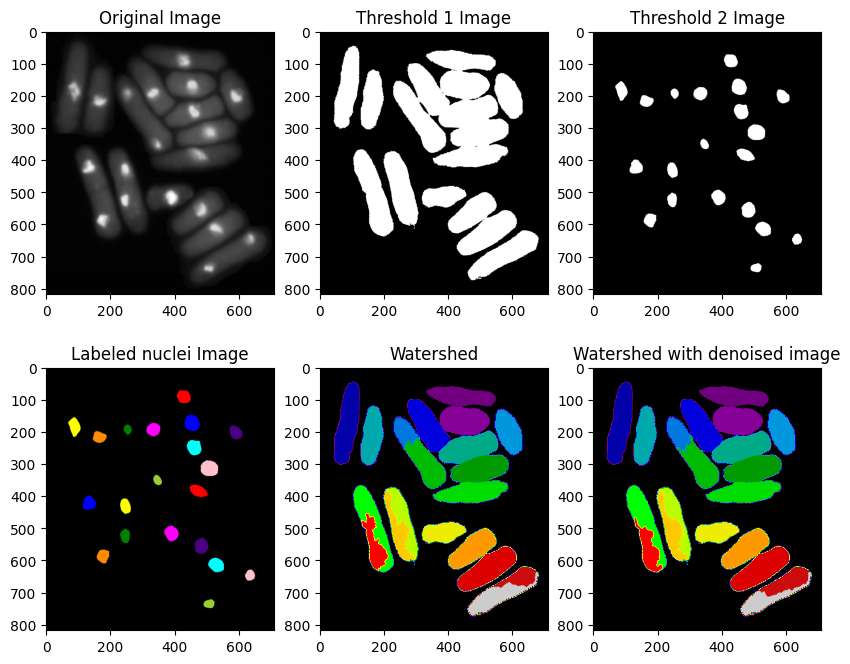

In [77]:
plt.figure(figsize=(10,8))
plt.subplot(231), plt.imshow(im, vmin = 0, vmax = 1), plt.title('Original Image') 
plt.subplot(232), plt.imshow(cellMask, vmin = 0, vmax = 1), plt.title('Threshold 1 Image') 
plt.subplot(233), plt.imshow(nucleiMask, vmin = 0, vmax = 1), plt.title('Threshold 2 Image') 
plt.subplot(234), plt.imshow(label_nuclei_image), plt.title('Labeled nuclei Image') 
plt.subplot(235), plt.imshow(watershed_labels, cmap=plt.cm.nipy_spectral), plt.title('Watershed')
plt.subplot(236), plt.imshow(watershed_labels_denoised, cmap=plt.cm.nipy_spectral), plt.title('Watershed with denoised image')  
